In [1]:
import csv
import numpy
import decimal
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
with open('../data/drinks.csv', 'rU') as f:
    header = csv.reader(f).next()
    data= [row for row in csv.reader(f)]

In [21]:
#creating beer list
beers_list = [data[x][1] for x in range(len(data))]
beers=[]
for x in range(len(data)):
    beers.append(data[x][1])

In [118]:
#creating EU Beers in List and Loop
EU_beers_list = [data[x][1] for x in range(len(data)) if data[x][5] == 'EU']
EU_beers=[]
for x in range(len(data)):
    if data[x][5] == 'EU':
        EU_beers.append(data[x][1])

In [83]:
#creating NA_beers list
NA_beers = [data[x][1] for x in range(len(data)) if data[x][5] == 'NA']

In [108]:
#Finding Averages of NA and EU

#converting values within list into float
NA_beers=map(float, NA_beers)
EU_beers=map(float, EU_beers)

NA_avg=reduce(lambda x,y: x+y, NA_beers)/len(NA_beers)
EU_avg=reduce(lambda x,y: x+y, EU_beers)/len(EU_beers)
#reduce makes it in a string
#lambda creates a tuple

NA_avg=format(NA_avg, '.2f')
EU_avg=format(EU_avg, '.2f')
#getcontext().prec = 2
#Decimal(NA_avg).quantize(Decimal('.01'), rounding=ROUND_DOWN)


In [110]:
output = [['continent', 'avg_beer'], ['NA', NA_avg], ['EU', EU_avg]]
with open('avg_beer.csv', 'wb') as f:
    for row in output:
        csv.writer(f).writerow(row)

In [117]:
f = open('avg_beer.csv', 'rU')
print(f.readline())
print(f.readline())
print(f.readline())
f.close()

continent,avg_beer

NA,145.43

EU,193.78



In [128]:
import requests
import json
import urllib2

In [163]:
api_endpoint = 'http://api.openweathermap.org/data/2.5/forecast/daily'
params = {}
params['q'] = 'London'
params['units'] = 'imperial'
params['cnt'] = '7'

response= requests.get(api_endpoint, params=params)
weather = response.json()
weather.keys()

[u'city', u'message', u'list', u'cod', u'cnt']

In [180]:
#weather['city']
#weather['cnt']
weather_data=weather['list']

In [193]:
weather_data

[{u'clouds': 8,
  u'deg': 204,
  u'dt': 1434992400,
  u'humidity': 68,
  u'pressure': 989.74,
  u'rain': 30.9,
  u'speed': 13.95,
  u'temp': {u'day': 75.63,
   u'eve': 72.82,
   u'max': 75.63,
   u'min': 65.88,
   u'morn': 75.63,
   u'night': 67.51},
  u'weather': [{u'description': u'heavy intensity rain',
    u'icon': u'10d',
    u'id': 502,
    u'main': u'Rain'}]},
 {u'clouds': 12,
  u'deg': 300,
  u'dt': 1435078800,
  u'humidity': 85,
  u'pressure': 988.72,
  u'speed': 20.35,
  u'temp': {u'day': 70.12,
   u'eve': 66.15,
   u'max': 70.12,
   u'min': 51.53,
   u'morn': 67.05,
   u'night': 51.53},
  u'weather': [{u'description': u'few clouds',
    u'icon': u'02d',
    u'id': 801,
    u'main': u'Clouds'}]},
 {u'clouds': 24,
  u'deg': 317,
  u'dt': 1435165200,
  u'humidity': 87,
  u'pressure': 997.41,
  u'speed': 7.65,
  u'temp': {u'day': 71.08,
   u'eve': 68.97,
   u'max': 71.94,
   u'min': 54.81,
   u'morn': 54.81,
   u'night': 61.93},
  u'weather': [{u'description': u'few clouds',
   

In [195]:
temperatures = [data_point['temp'] for data_point in weather_data]

In [199]:
humidities = [data_point['humidity'] for data_point in weather_data]

In [202]:
dates = [data_point['dt'] for data_point in weather_data]
dates = [datetime.fromtimestamp(epoch) for epoch in dates]

In [203]:
dates

[datetime.datetime(2015, 6, 22, 10, 0),
 datetime.datetime(2015, 6, 23, 10, 0),
 datetime.datetime(2015, 6, 24, 10, 0),
 datetime.datetime(2015, 6, 25, 10, 0),
 datetime.datetime(2015, 6, 26, 10, 0),
 datetime.datetime(2015, 6, 27, 10, 0),
 datetime.datetime(2015, 6, 28, 10, 0)]

In [217]:
pressures = [data_point['pressure'] for data_point in weather_data]

In [211]:
temp_day = [data_point['day'] for data_point in temperatures]

In [213]:
temp_day

[75.63, 70.12, 71.08, 71.35, 72.12, 68.41, 60.24]

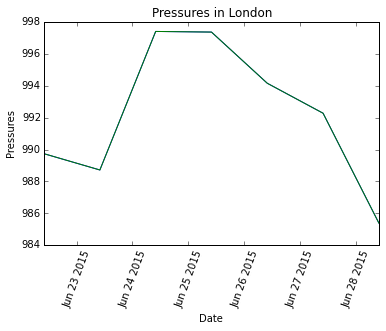

In [220]:
plt.plot(dates, pressures)

plt.xlabel("Date")                          # set the x axis label
plt.ylabel("Pressures")         # set the y axis label
plt.title("Pressures in London")  # set the title
locs, labels = plt.xticks()                 # get the x tick marks
plt.setp(labels, rotation=70)               # rotate the x ticks marks by 70 degrees
plt.plot(dates, pressures)               # plot again :)

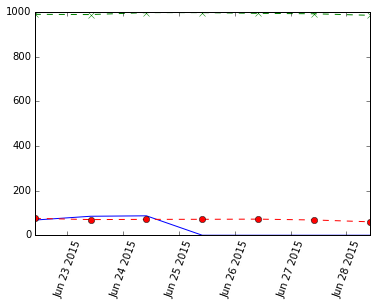

In [232]:
plt.legend()
locs, labels = plt.xticks()                 
plt.setp(labels, rotation=70)     
plt.plot(dates, humidities, label='Humidity')
plt.plot(dates, temp_day, marker='o', linestyle='--', color='r', label='Temperature')
plt.plot(dates, pressures, marker='x', linestyle='--', color='g', label='Pressure')

In [229]:
 #normalized data
temp_norm = [float(t) / max(temp_day) for t in temp_day]
hum_norm = [float(h) / max(humidities) for h in humidities]
press_norm = [float(p) / max(pressures) for p in pressures]

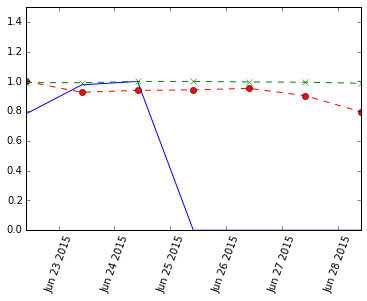

In [248]:
import matplotlib.figure as fig
#Figure.set_size_inches(18.5, 10.5)
#plt.figure(figsize=(20,10))
#plt.ticklabel_format(style='sci', axis='y', ylim=(0,2))
matplotlib.pyplot.ylim(ymax=1.5) 
plt.legend()                            
locs, labels = plt.xticks()                 
plt.setp(labels, rotation=70)     
plt.plot(dates, hum_norm, label='Humidity')
plt.plot(dates, temp_norm, marker='o', linestyle='--', color='r', label='Temperature')
plt.plot(dates, press_norm, marker='x', linestyle='--', color='g', label='Pressure')

In [197]:
#numpy array
#NA_beers=np.asarray(NA_beers)
np.mean(NA_beers)

145.43478260869566